In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import datetime
from datetime import date

In [2]:
df_train = pd.read_csv("fraudTrain.csv")
df_train.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [3]:
df_test = pd.read_csv("fraudTest.csv")
df_test.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [4]:
df_train.shape

(1296675, 23)

In [5]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
df_test.shape

(555719, 23)

In [8]:
df_test['is_fraud'].value_counts(normalize=True)

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

In [9]:
# Concatenating train and test dataset
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape 

(1852394, 23)

In [10]:
# remove the column unnamed
df = df.drop('Unnamed: 0', axis=1)
df.head(1) 

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [12]:
#check columns that have missing values
df.isna().sum().sum() #.sort_values(ascending=False)

0

In [13]:
# taking a look at the data types
df.dtypes.value_counts()

object     12
int64       5
float64     5
dtype: int64

In [14]:
df.select_dtypes(include='number')

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [15]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [16]:
df['is_fraud'] = df['is_fraud'].map({0: 'No', 1: 'Yes'})
df['is_fraud'].value_counts(normalize=True)

No     0.99479
Yes    0.00521
Name: is_fraud, dtype: float64

### Date Column cleanning

In [17]:
# converting trans_date_trans_time 
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [18]:
# converting dob to date time
df['dob'] = pd.to_datetime(df['dob']).dt.date

In [19]:
# convert the trans_date_trans_time datetime column to month, year, and day 
df['trans_date_month'] = pd.DatetimeIndex(df['trans_date_trans_time']).month_name()
df['trans_date_year'] = df['trans_date_trans_time'].dt.year
df['trans_date_day'] = df['trans_date_trans_time'].dt.day
df['trans_date_time'] = df['trans_date_trans_time'].dt.time 
df['trans_date'] = df['trans_date_trans_time'].dt.date 

In [20]:
df['trans_date'].head()

0    2019-01-01
1    2019-01-01
2    2019-01-01
3    2019-01-01
4    2019-01-01
Name: trans_date, dtype: object

In [21]:
# Age calculation
# get current date
current_date = pd.Timestamp(datetime.date.today())

#Create a new variable Age
df['age'] = current_date - pd.to_datetime(df['dob'])

# calculate age
df['age'] = (current_date - pd.to_datetime(df['dob'])).astype('<m8[Y]').astype(int)

In [22]:
# Convert Unix time to datetime object
df['datetime'] = df['unix_time'].apply(datetime.datetime.fromtimestamp)

# Convert datetime object to formatted string
df['time_str'] = df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [23]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,trans_date_month,trans_date_year,trans_date_day,trans_date_time,trans_date,age,datetime,time_str
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,No,January,2019,1,00:00:18,2019-01-01,35,2011-12-31 19:00:18,2011-12-31 19:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,No,January,2019,1,00:00:44,2019-01-01,44,2011-12-31 19:00:44,2011-12-31 19:00:44


### Categorical Columns

In [24]:
cat_df = df.select_dtypes(include='O')
cat_df.head()

,merchant,category,first,last,gender,street,city,state,job,dob,trans_num,is_fraud,trans_date_month,trans_date_time,trans_date,time_str
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,No,January,00:00:18,2019-01-01,2011-12-31 19:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,No,January,00:00:44,2019-01-01,2011-12-31 19:00:44
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,No,January,00:00:51,2019-01-01,2011-12-31 19:00:51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,No,January,00:01:16,2019-01-01,2011-12-31 19:01:16
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,No,January,00:03:06,2019-01-01,2011-12-31 19:03:06


In [25]:
df.drop(['street', 'city', 'zip', 'street'], 
        inplace=True, axis=1)
# 'cc_num', 'trans_num',

In [26]:
cat_df.columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num', 'is_fraud', 'trans_date_month',
       'trans_date_time', 'trans_date', 'time_str'],
      dtype='object')

In [27]:
df['full_name'] = df['first'].str.cat(df['last'], sep=' ')
df.drop(['first', 'last'], axis=1, inplace=True)

In [28]:
df.describe(include=['object', 'bool'])

,merchant,category,gender,state,job,dob,trans_num,is_fraud,trans_date_month,trans_date_time,trans_date,time_str,full_name
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,693,14,2,51,497,984,1852394,2,12,86400,730,1819582,989
top,fraud_Kilback LLC,gas_transport,F,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,No,December,23:33:40,2020-11-30,2013-05-31 21:37:47,Scott Martin
freq,6262,188029,1014749,135269,13898,8044,1,1842743,280598,52,6530,4,6583


In [29]:
# each user used one credit card
df.groupby(['full_name', 'dob']).agg(
    {'cc_num': 'nunique'}).reset_index()['cc_num'].max()

1

### Daily Number Transactions per Customer

In [30]:
fraud_trans = df[df['is_fraud'] == 'Yes']
legit_trans = df[df['is_fraud'] == 'No']

In [31]:
# grouping the databy full name and counting the number of transactions per customer
fraud_trans_count = (
    fraud_trans.groupby(["full_name", "trans_date"])
    .agg({"trans_num": "count"})
    .reset_index()
    .rename(columns={"trans_num": "no_transactions_per_customer"})
)

# grouping the databy full name and counting the number of transactions per customer
legit_trans_count = (
    legit_trans.groupby(["full_name", "trans_date"])
    .agg({"trans_num": "count"})
    .reset_index()
    .rename(columns={"trans_num": "no_transactions_per_customer"})
)


In [32]:
legit_trans_count.head()


,full_name,trans_date,no_transactions_per_customer
0,Aaron Murray,2019-01-01,7
1,Aaron Murray,2019-01-02,1
2,Aaron Murray,2019-01-03,2
3,Aaron Murray,2019-01-05,3
4,Aaron Murray,2019-01-06,2


In [33]:
fraud_trans_count.head()

,full_name,trans_date,no_transactions_per_customer
0,Aaron Murray,2019-02-07,2
1,Aaron Murray,2019-02-08,6
2,Aaron Pena,2020-10-17,3
3,Aaron Pena,2020-10-18,4
4,Aaron Rogers,2019-09-07,12


In [34]:
def plot_trans_count_by_cust(name):
  fraud_cust = fraud_trans_count[fraud_trans_count['full_name'] == name]

  # Create a Plotly figure with a line plot of the transaction count over time.
  fig = px.line(
      legit_trans_count[legit_trans_count["full_name"] == name],
      x="trans_date",
      y="no_transactions_per_customer",
      labels={
          "trans_date": "Transaction date",
          "no_transactions_per_customer": "Number of transactions",
      },
      title=f"Daily Transaction counts for customer: {name}",
  )

  # Legend for line plot
  fig["data"][0]["showlegend"] = True
  fig["data"][0]["name"] = "Legitimate"

  fig.add_scatter(
      x=fraud_cust["trans_date"],
      y=fraud_cust["no_transactions_per_customer"],
      mode="markers",
      name="Fraudulent",
  )

  # Update the layout to set the x-axis and y-axis labels.
  fig.update_layout(xaxis_title="Transaction Date", yaxis_title="Transaction Count")

  fig.update_layout(
      legend=dict(
          title="Transaction type",
          orientation="h",
          yanchor="bottom",
          y=1.02,
          xanchor="right",
          x=1,
      )
  )

  # Show the plot
  fig.show()


In [35]:
fraud_trans.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_date_month',
       'trans_date_year', 'trans_date_day', 'trans_date_time', 'trans_date',
       'age', 'datetime', 'time_str', 'full_name'],
      dtype='object')

In [36]:
random_names = df["full_name"].unique()
np.random.shuffle(random_names)
for name in random_names[:5]:
  plot_trans_count_by_cust(name)

In [37]:
fraud_trans_count.head(10)

,full_name,trans_date,no_transactions_per_customer
0,Aaron Murray,2019-02-07,2
1,Aaron Murray,2019-02-08,6
2,Aaron Pena,2020-10-17,3
3,Aaron Pena,2020-10-18,4
4,Aaron Rogers,2019-09-07,12
5,Aaron Stewart,2020-01-15,6
6,Aaron Stewart,2020-01-16,2
7,Adam Keller,2019-04-12,7
8,Adam Keller,2019-04-13,7
9,Adam Kirk,2019-02-17,6


In [38]:
legit_trans_count.head()

,full_name,trans_date,no_transactions_per_customer
0,Aaron Murray,2019-01-01,7
1,Aaron Murray,2019-01-02,1
2,Aaron Murray,2019-01-03,2
3,Aaron Murray,2019-01-05,3
4,Aaron Murray,2019-01-06,2


In [39]:
only_fraud_cust = set(df['full_name'].unique()) - set(legit_trans_count['full_name'].unique())
len(only_fraud_cust)

88

In [40]:
fraud_days_count = fraud_trans_count.groupby(
        'full_name')['trans_date'].count().reset_index(name='no_fraud_days')
fraud_days_count.head()

# [fraud_trans_count['full_name'].isin(
#     only_fraud_cust)]

,full_name,no_fraud_days
0,Aaron Murray,2
1,Aaron Pena,2
2,Aaron Rogers,1
3,Aaron Stewart,2
4,Adam Keller,2


In [41]:
fraud_days_count['no_fraud_days'].value_counts()

2    933
1     25
4      8
3      1
Name: no_fraud_days, dtype: int64

In [42]:
# most fraudulent transactions seems to be logged at 00:00, Investigate?
# that is not the case 
fraud_trans['trans_date_time'].value_counts()

22:10:59    5
23:48:32    5
23:21:08    5
22:22:44    5
22:28:19    5
           ..
00:12:19    1
23:36:56    1
23:30:59    1
23:20:31    1
23:13:39    1
Name: trans_date_time, Length: 8008, dtype: int64

In [43]:
fraud_trans[fraud_trans['trans_date_time'] == datetime.time(22, 10, 59)]['full_name']

106628         Mary Diaz
230693     Mary Mcintyre
309039     Steven Arnold
736686       Kurt Peters
1686023      Gina Grimes
Name: full_name, dtype: object

In [44]:
fraud_trans[fraud_trans['full_name'] == 'Mary Diaz']['trans_date_trans_time']

102490   2019-03-01 01:32:53
102556   2019-03-01 02:42:25
104145   2019-03-01 23:06:58
106627   2019-03-02 22:10:38
106628   2019-03-02 22:10:59
106735   2019-03-02 23:01:54
106751   2019-03-02 23:08:08
106760   2019-03-02 23:11:08
106835   2019-03-02 23:43:40
Name: trans_date_trans_time, dtype: datetime64[ns]

In [45]:
def plot_trans_amnt_by_cust(name):
  fraud_cust = fraud_trans[fraud_trans['full_name'] == name]

  # Create a Plotly figure with a line plot of the transaction count over time.
  fig = px.line(
      legit_trans[legit_trans["full_name"] == name],
      x="trans_date_trans_time",
      y="amt",
      labels={
          "trans_date_trans_time": "Transaction date",
          "amt": "Amount",
      },
      title=f"Daily Transaction counts for customer: {name}",
  )

  # Legend for line plot
  fig["data"][0]["showlegend"] = True
  fig["data"][0]["name"] = "Legitimate"

  fig.add_scatter(
      x=fraud_cust["trans_date_trans_time"],
      y=fraud_cust["amt"],
      mode="markers",
      name="Fraudulent",
  )

  # Update the layout to set the x-axis and y-axis labels.
  fig.update_layout(xaxis_title="Transaction Date", yaxis_title="Amount")

  fig.update_layout(
      legend=dict(
          title="Transaction type",
          orientation="h",
          yanchor="bottom",
          y=1.02,
          xanchor="right",
          x=1,
      )
  )

  # Show the plot
  fig.show()


In [46]:
plot_trans_amnt_by_cust('Mary Diaz')

In [47]:
# fraud_trans['trans_date_time'].min()
fraud_trans['trans_date_time'].max()

datetime.time(23, 59, 59)

### Fraud transcations on consecutive days??
**Look at `fraud_trans`, are fraudulent transactions for each customer happening on consecutive days?**

In [48]:
cust_fraud_per_day = fraud_trans.groupby(
    ['full_name', 'trans_date']
    )['trans_date'].count().reset_index(name='no_fraud_per_day') 
cust_fraud_per_day

,full_name,trans_date,no_fraud_per_day
0,Aaron Murray,2019-02-07,2
1,Aaron Murray,2019-02-08,6
2,Aaron Pena,2020-10-17,3
3,Aaron Pena,2020-10-18,4
4,Aaron Rogers,2019-09-07,12
...,...,...,...
1921,Xavier Beltran,2020-01-13,6
1922,Zachary Allen,2019-02-25,4
1923,Zachary Allen,2019-02-26,4
1924,Zachary Boone,2020-05-17,4


In [49]:
fraud_days_count.head()

,full_name,no_fraud_days
0,Aaron Murray,2
1,Aaron Pena,2
2,Aaron Rogers,1
3,Aaron Stewart,2
4,Adam Keller,2


In [50]:
fraud_days_count['no_fraud_days'].value_counts()

2    933
1     25
4      8
3      1
Name: no_fraud_days, dtype: int64

In [51]:
fraud_days_count.shape

(967, 2)

In [52]:
def probe_fraud_consec_days(no_fraud_days: int):
    # get customers that performed fraudulent transactions in exactly n days 
    # using fraud_days_count
    cust_fraud_only_n_days = fraud_days_count[
        fraud_days_count["no_fraud_days"] == no_fraud_days
    ]["full_name"]
    n_days_fraud_df = cust_fraud_per_day[
        cust_fraud_per_day["full_name"].isin(cust_fraud_only_n_days)
    ]
    # get date diff for customers above 
    # we expect the max date diff to be less than n 
    # if the fraudulent transaction occured in consecutive days
    cust_fraud_date_diff = (
        n_days_fraud_df.groupby("full_name")["trans_date"]
        .apply(lambda x: (x.iloc[-1] - x.iloc[0]).days)
        .reset_index(name="date_diff")
    )
    if max(cust_fraud_date_diff["date_diff"].unique()) >= no_fraud_days:
        cust = cust_fraud_date_diff[cust_fraud_date_diff["date_diff"] >= no_fraud_days][
            "full_name"
        ]
        print(
            f"Fraudulent transactions did not happen on {no_fraud_days} consecutive days for customers: {cust.values}"
        )
    else:
        print(
            f"Fraudulent transactions happened on consecutive days for {no_fraud_days}"
        )


In [53]:
probe_fraud_consec_days(2) 

Fraudulent transactions did not happen on 2 consecutive days for customers: ['Patricia Mendoza']


In [54]:
probe_fraud_consec_days(3) 

Fraudulent transactions happened on consecutive days for 3


In [55]:
probe_fraud_consec_days(4) 

Fraudulent transactions did not happen on 4 consecutive days for customers: ['Jeffrey Smith' 'Jennifer Scott' 'John Nichols' 'Linda Davis'
 'Rachel Johnson' 'Robert James' 'Scott Martin' 'Susan Garcia']


In [56]:
cust_fraud_only_4_days = fraud_days_count[
    fraud_days_count["no_fraud_days"] == 4
]["full_name"]

four_days_fraud_df = cust_fraud_per_day[
    cust_fraud_per_day["full_name"].isin(cust_fraud_only_4_days)
]

four_days_fraud_df.head(10)

,full_name,trans_date,no_fraud_per_day
812,Jeffrey Smith,2019-10-08,3
813,Jeffrey Smith,2019-10-09,5
814,Jeffrey Smith,2020-07-18,3
815,Jeffrey Smith,2020-07-19,9
839,Jennifer Scott,2019-01-09,7
840,Jennifer Scott,2019-01-10,4
841,Jennifer Scott,2019-06-20,5
842,Jennifer Scott,2019-06-21,10
933,John Nichols,2019-11-14,2
934,John Nichols,2019-11-15,6


In [57]:
def probe_fraud_consec_days_rolling(no_fraud_days):
    # get customers that performed fraudulent transactions in exactly n days 
    # using fraud_days_count
    cust_fraud_only_n_days = fraud_days_count[
        fraud_days_count["no_fraud_days"] == no_fraud_days
    ]["full_name"]
    n_days_fraud_df = cust_fraud_per_day[
        cust_fraud_per_day["full_name"].isin(cust_fraud_only_n_days)
    ]
    n_days_fraud_df.reset_index(inplace=True, drop=True)

    # get date diff for customers above 
    # we expect the max date diff to be less than two
    # if the fraudulent transaction occured in two consecutive days
    cust_fraud_date_diff = (
    n_days_fraud_df.groupby(
    [n_days_fraud_df.index // 2, 'full_name'])['trans_date'].apply(
        lambda x: (x.iloc[-1] - x.iloc[0]).days).reset_index(name='date_diff')
    )

    if max(cust_fraud_date_diff["date_diff"].unique()) >= no_fraud_days:
        cust = cust_fraud_date_diff[cust_fraud_date_diff["date_diff"] >= no_fraud_days][
            "full_name"
        ]
        print(
            f"Fraudulent transactions did not happen on two consecutive days for customers: {cust.values}"
        )
    else:
        print(
            f"Fraudulent transactions happened on two consecutive days"
        )

In [58]:
probe_fraud_consec_days_rolling(4)

Fraudulent transactions happened on two consecutive days


### Plot - Transaction amount

In [59]:
fig = px.line(df[df['is_fraud'] == 'Yes'], x='trans_date_trans_time', y='amt',
              title='Transaction amount per day') 
fig.update_layout(xaxis_title='Date', yaxis_title='Amount')
fig.show()

In [60]:
fig = px.box(df[df['is_fraud'] == 'Yes'], x='amt', 
             title='Transaction Amount Distribution') 
fig.update_layout(xaxis_title='Amount')
fig.show()

In [61]:
df.groupby(['is_fraud']).agg({'amt': ['max', 'min', 'mean', 'median', 'std']})

amt                                      
               max   min        mean  median         std
is_fraud                                                
No        28948.90  1.00   67.651278   47.24  153.548108
Yes        1376.04  1.06  530.661412  390.00  391.028873

# Plot

In [62]:
# Number of fraudulent transactions by merchant
px.histogram(df[df['is_fraud'] == 'Yes'], x='merchant')

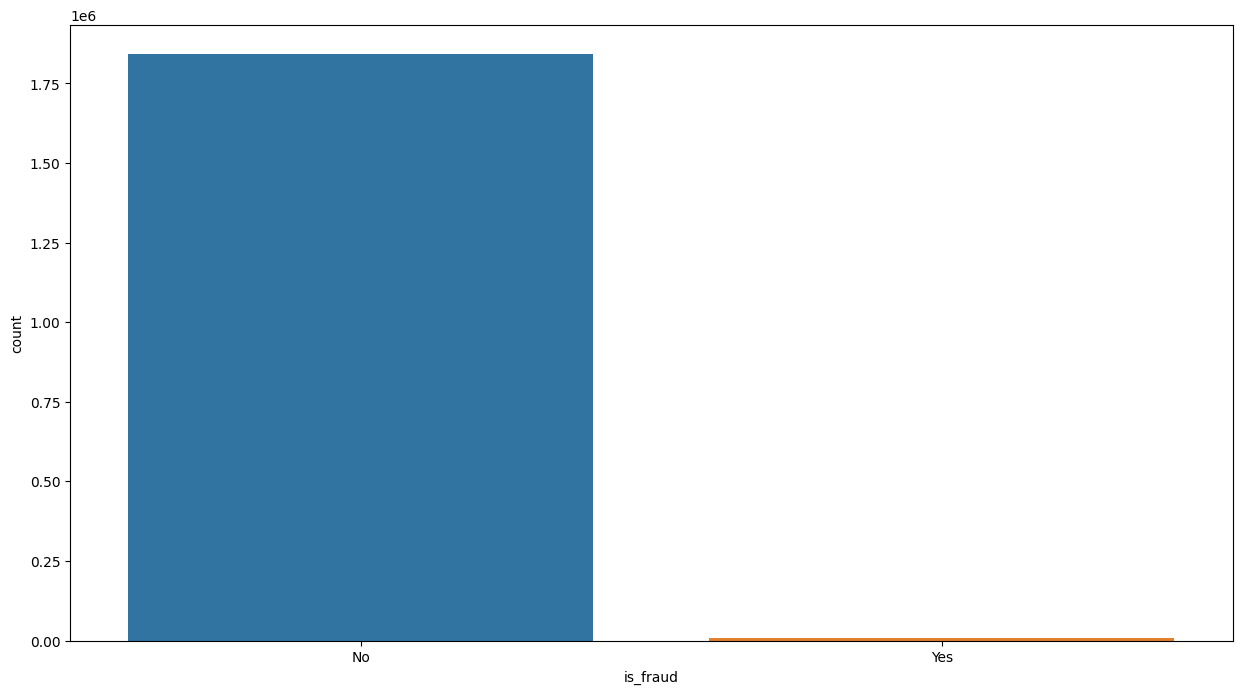

In [63]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='is_fraud');

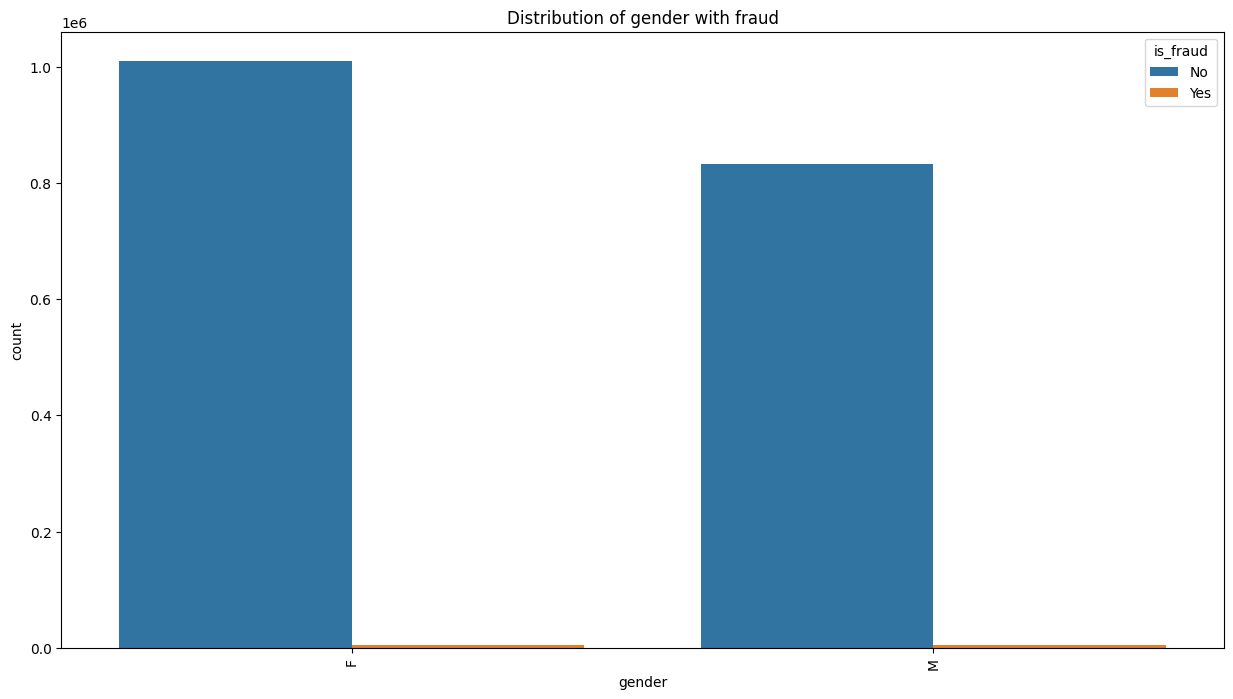

In [64]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='gender', hue='is_fraud')
plt.title('Distribution of gender with fraud')
plt.xticks(rotation=90);

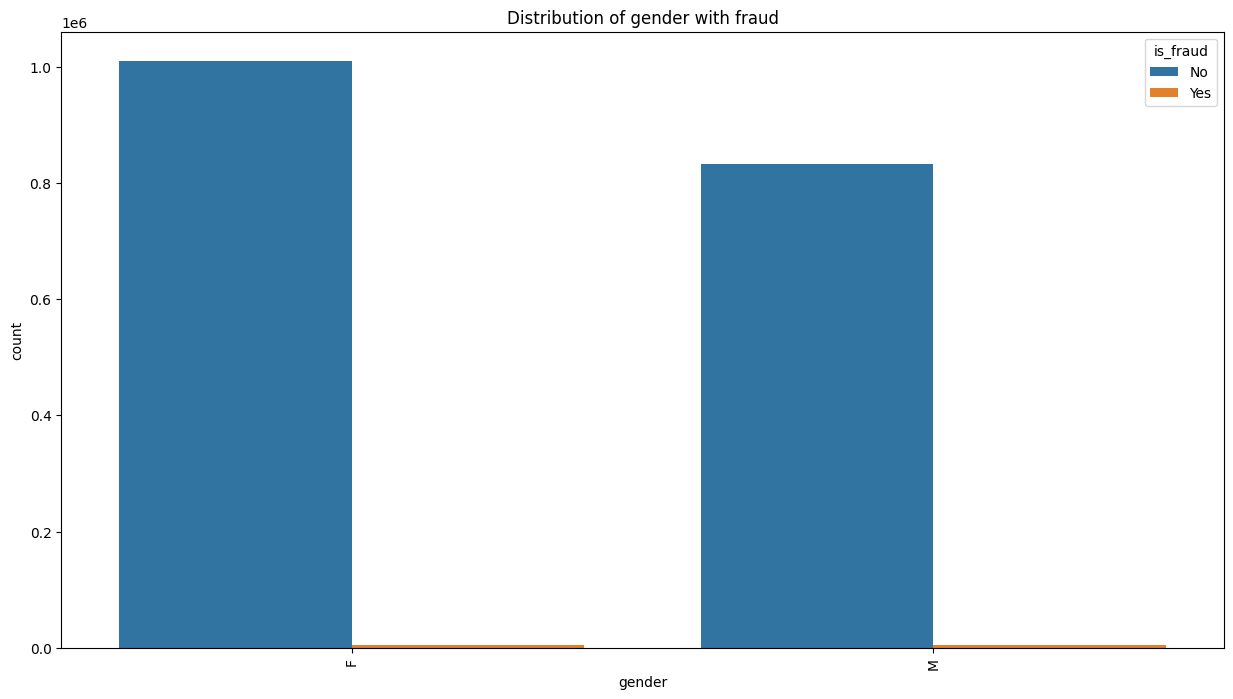

In [65]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='gender', hue='is_fraud')
plt.title('Distribution of gender with fraud')
plt.xticks(rotation=90);

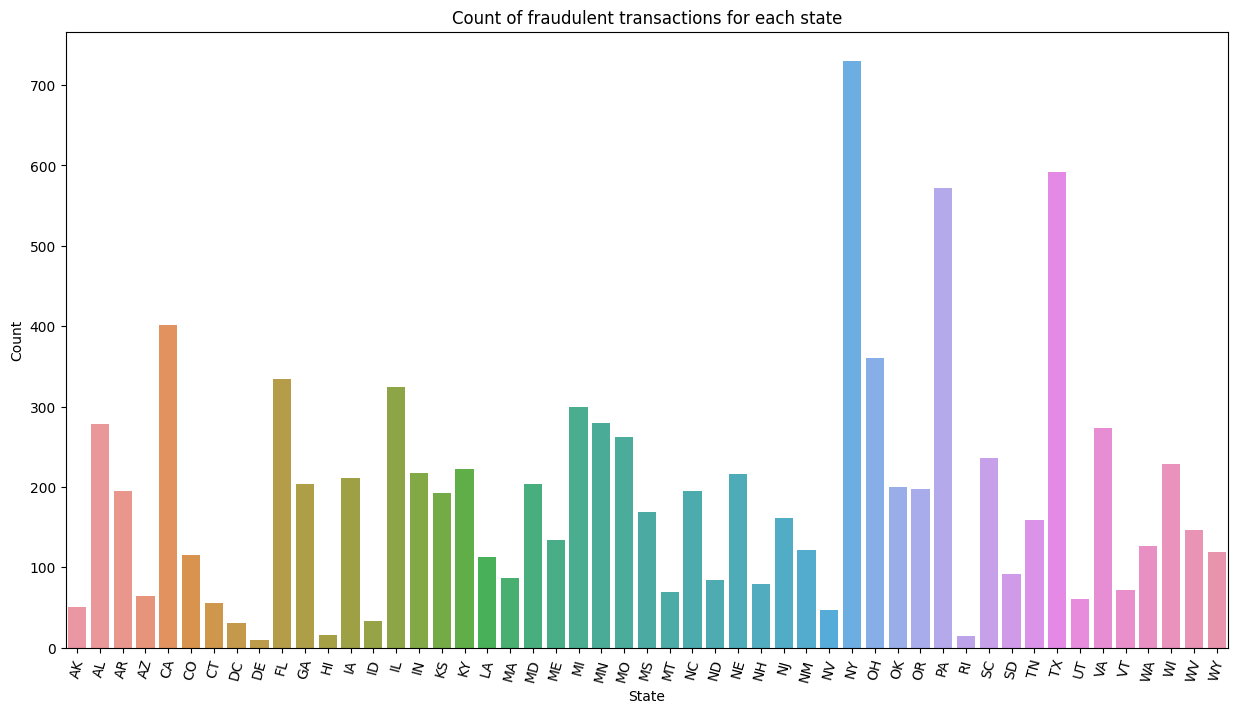

In [66]:
# grouping the data by states and is fraud and counting the number of rows for each group
state_counts = df.groupby(['state', 'is_fraud']).size().reset_index(name='count')

# filter the data to only show is_fraud=True
fraud_counts = state_counts[state_counts['is_fraud'] == 'Yes']

# create the barplot using Seaborn
plt.figure(figsize=(15,8))
sns.barplot(data=fraud_counts, x='state', y='count')
plt.title('Count of fraudulent transactions for each state')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=75)
# display the plot
plt.show()

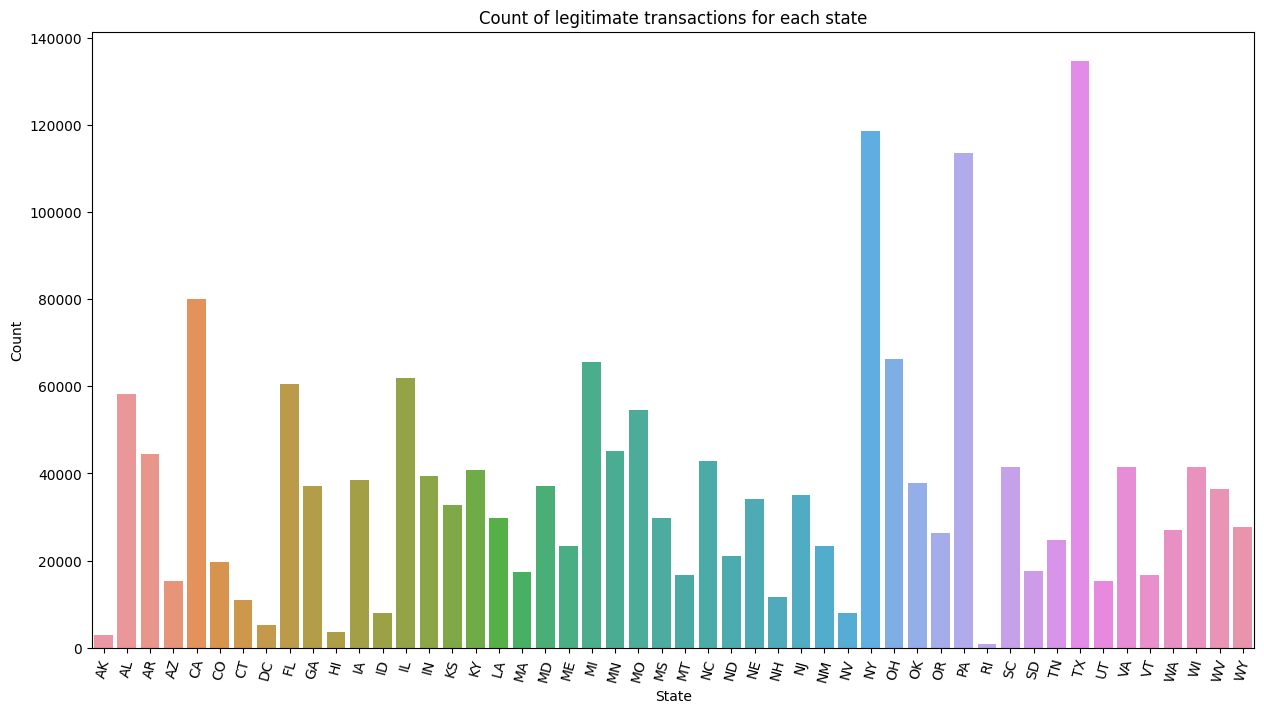

In [67]:
# grouping the data by states and is fraud and counting the number of rows for each group
state_counts = df.groupby(['state', 'is_fraud']).size().reset_index(name='count')

# filter the data to only show is_fraud=True
fraud_counts = state_counts[state_counts['is_fraud'] == 'No']

# create the barplot using Seaborn
plt.figure(figsize=(15,8))
sns.barplot(data=fraud_counts, x='state', y='count')
plt.title('Count of legitimate transactions for each state')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=75)
# display the plot
plt.show()

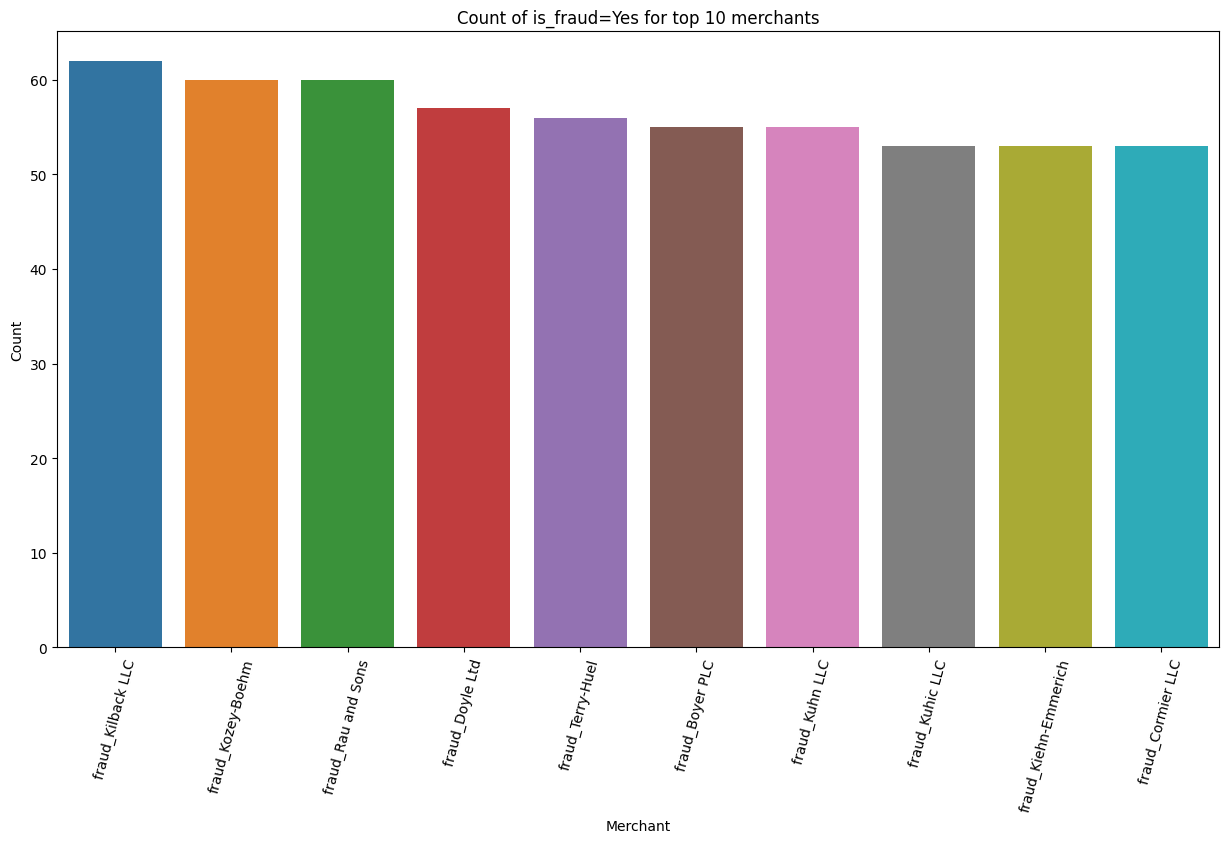

In [68]:
# grouping the data by merchants and is fraud and counting the number of rows for each group
merchant_counts = df.groupby(['merchant', 'is_fraud']).size().reset_index(name='count')

# filter the data to only show is_fraud=True
fraud_counts = merchant_counts[merchant_counts['is_fraud'] == 'Yes']


# sort the data by count in descending order and select the top 10 rows
top_merchants = fraud_counts.sort_values('count', ascending=False).head(10)

# create the barplot using Seaborn
plt.figure(figsize=(15,8))
sns.barplot(data=top_merchants, x='merchant', y='count')
plt.title('Count of is_fraud=Yes for top 10 merchants')
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.xticks(rotation=75)

# display the plot
plt.show()

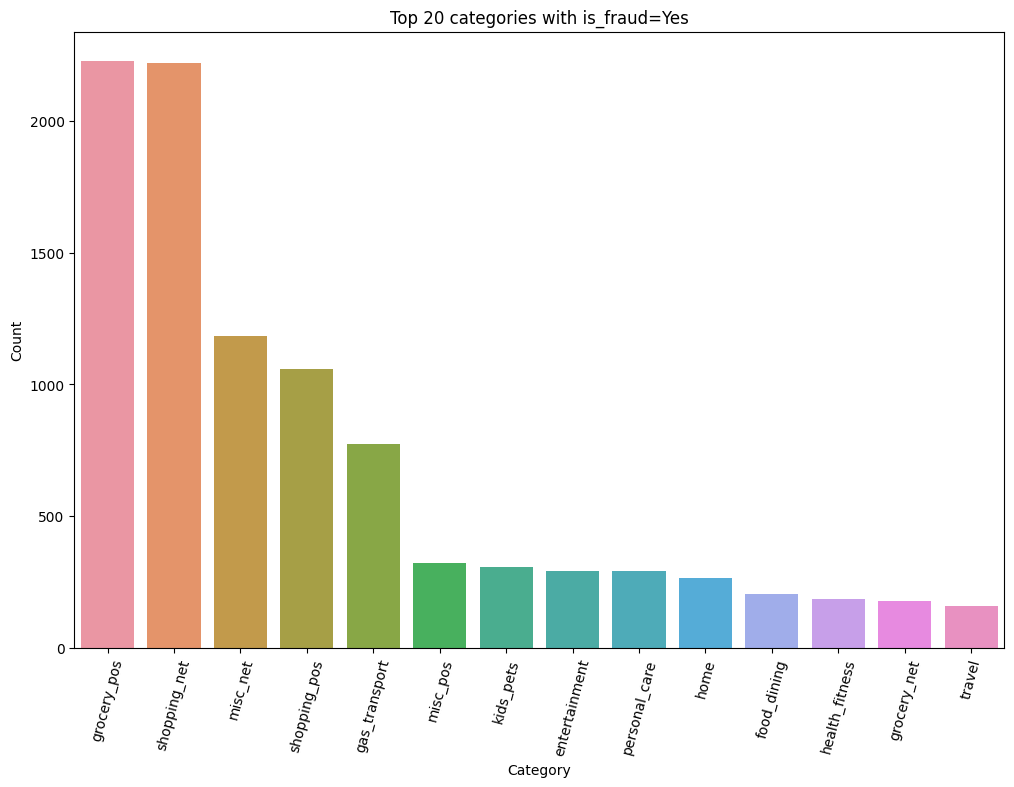

In [69]:
# grouping the data by category and is fraud and counting the number of rows for each group
category_counts = df.groupby(['category', 'is_fraud']).size().reset_index(name='count')

# filter the data to only show is_fraud = No
no_fraud_counts = category_counts[category_counts['is_fraud'] == 'Yes']

# sort the values by count in descending order and get the top 20 categories
top_categories = no_fraud_counts.sort_values('count', ascending=False).head(20)

# create the barplot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_categories, x='category', y='count')
plt.title('Top 20 categories with is_fraud=Yes')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

In [70]:
# Sort the dataframe by amount in descending order and get the 10 highest amount
highest_amt = df[df['is_fraud'] == 'Yes'].sort_values(by='amt', ascending=False).head(10)
highest_amt['amt']

1262544    1376.04
514148     1371.81
30239      1334.07
1258483    1324.80
1570853    1320.92
1452524    1319.97
1721799    1318.89
821435     1313.18
1258594    1312.98
872879     1294.83
Name: amt, dtype: float64

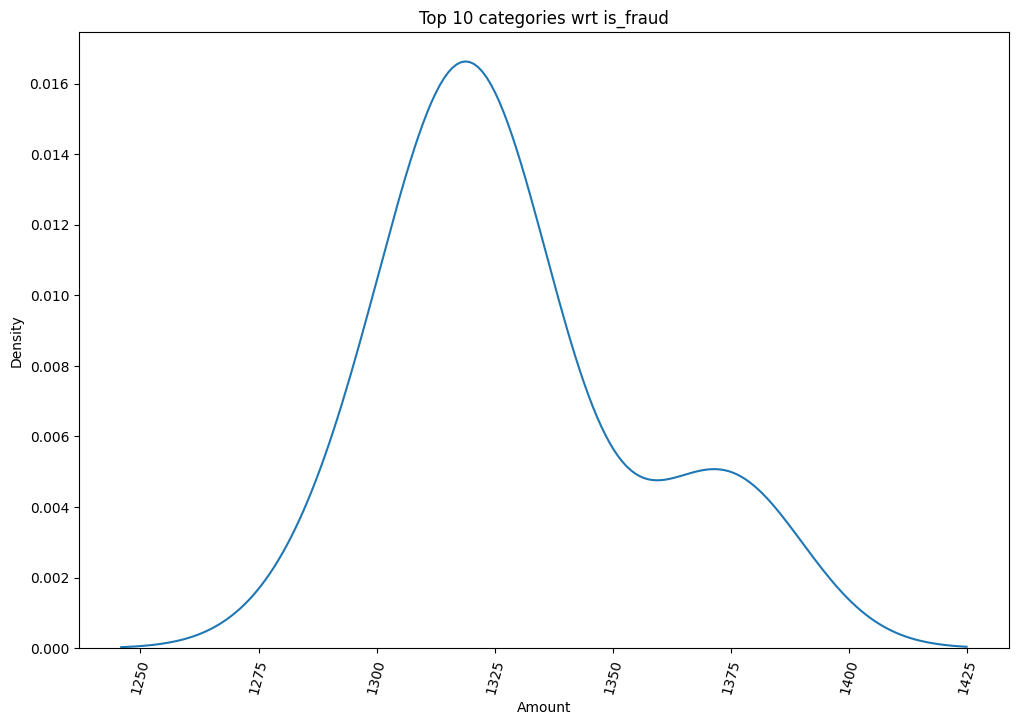

In [71]:
# create the barplot using Seaborn
plt.figure(figsize=(12, 8))
# Create a histogram of the 10 highest ages split by is_fraud
sns.kdeplot(x='amt', data=highest_amt)
plt.title('Top 10 categories wrt is_fraud')
plt.xlabel('Amount')
# plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

In [72]:
df.corr().style.background_gradient(cmap='Oranges')

C:\Users\ve797\AppData\Local\Temp\ipykernel_21828\2324922876.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_date_year,trans_date_day,age
cc_num,1.000000,0.001826,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,0.000443,-0.000136,-0.001821
amt,0.001826,1.000000,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,-0.001266,0.000069,-0.010651
lat,-0.058744,-0.000670,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.001140,-0.000767,0.046973
long,-0.048429,-0.000735,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.000012,0.000115,-0.029439
city_pop,-0.009118,0.004921,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,-0.001660,0.000654,-0.092167
unix_time,0.000284,-0.002411,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,0.867243,0.048073,-0.004251
merch_lat,-0.058415,-0.000613,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.001108,-0.000865,0.046601
merch_long,-0.048421,-0.000711,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000010,0.000129,-0.029395
trans_date_year,0.000443,-0.001266,0.001140,0.000012,-0.001660,0.867243,0.001108,0.000010,1.000000,0.000743,-0.004625
trans_date_day,-0.000136,0.000069,-0.000767,0.000115,0.000654,0.048073,-0.000865,0.000129,0.000743,1.000000,-0.000561


In [73]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,...,is_fraud,trans_date_month,trans_date_year,trans_date_day,trans_date_time,trans_date,age,datetime,time_str,full_name
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,...,No,January,2019,1,00:00:18,2019-01-01,35,2011-12-31 19:00:18,2011-12-31 19:00:18,Jennifer Banks
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,...,No,January,2019,1,00:00:44,2019-01-01,44,2011-12-31 19:00:44,2011-12-31 19:00:44,Stephanie Gill
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,...,No,January,2019,1,00:00:51,2019-01-01,61,2011-12-31 19:00:51,2011-12-31 19:00:51,Edward Sanchez
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,...,No,January,2019,1,00:01:16,2019-01-01,56,2011-12-31 19:01:16,2011-12-31 19:01:16,Jeremy White
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,...,No,January,2019,1,00:03:06,2019-01-01,37,2011-12-31 19:03:06,2011-12-31 19:03:06,Tyler Garcia


###  Modeling

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.calibration import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

In [75]:
# Drop the 'is_fraud' column to prepare data for splitting
X = df.drop(columns=['is_fraud'])

In [76]:
# Get the target variable
y = df['is_fraud']


### Label Encoding

In [77]:
 # label encode features and target
X = X.apply(LabelEncoder().fit_transform)
y = y.map({"Yes": 1, "No": 0})

In [78]:
# Split data into training, validation and test sets, ensuring the is_fraud distribution is maintained
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, stratify=df['is_fraud'], random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

### Scaling the Training, Validation and Test dataset

In [79]:
# Initialize the StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [80]:
# Scale the training, validation, and test sets using the scaler
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

### Undersampling

In [81]:
# Undersampling will be utilized to address the issue of imbalanced classes.

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
# Undersample the training set
X_train_under, y_train_under = rus.fit_resample(X_train_std, y_train)
# Undersample the validation set
X_val_under, y_val_under = rus.fit_resample(X_val_std, y_val)


### Dummy Classifier

In [82]:
# Dummy Classifier
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)
DummyClassifier()

DummyClassifier()

### Logistic Regression

In [83]:

# Run CV with 5 folds (logit)
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)
logistic = linear_model.LogisticRegression(solver='lbfgs',
max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5,
scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

### Support Vector Machine (SVM)

In [85]:

# # Support Vector Machine (SVM)
# Run CV with 5 folds (SVM)
C = [1]
gammas = [0.001, 0.1]
param_grid = dict(C=C, gamma=gammas)
svm1 = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc',verbose=10, n_jobs=-1)
svm_grid.fit(X_train_under, y_train_under)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

### Naive Bayes

In [87]:
# Naive Bayes
# Fit a Naive Bayes Model
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)


### Random Forest

In [88]:
# Random Forest
# Run CV with 5 folds (Random Forest)
# Create the parameter grid based on the results of random search
param_grid = {'max_depth': [5, 10, 15],'max_features': ['sqrt'],'min_samples_leaf': [10, 20],'min_samples_split': [2, 5],'n_estimators': [500, 700]}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

In [96]:
def plot_roc_curves(X, y, models, model_names, figsize=(20,18)):
   fig, ax = plt.subplots(figsize=figsize)
   # Loop over models and plot ROC curve
   for i, model in enumerate(models):
      y_pred = list(model.predict_proba(X)[:, 1])
      fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
      roc_auc = metrics.auc(fpr, tpr)
      plt.plot(fpr, tpr, label=(model_names[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)
      ax.grid(False)
      ax.tick_params(length=6, width=2, labelsize=30, grid_color='r', grid_alpha=0.5)
      leg = plt.legend(loc='lower right', prop={'size': 25})
      leg.get_frame().set_edgecolor('b')
      plt.title('Receiver Operating Characteristic (ROC)', fontsize=40)
      plt.plot([0, 1], [0, 1], 'r--')
      plt.xlim([-.02, 1.02])
      plt.ylim([-.02, 1.02])
      plt.ylabel('True Positive Rate', fontsize=30)
      plt.xlabel('False Positive Rate', fontsize=30)
      plt.show()
    


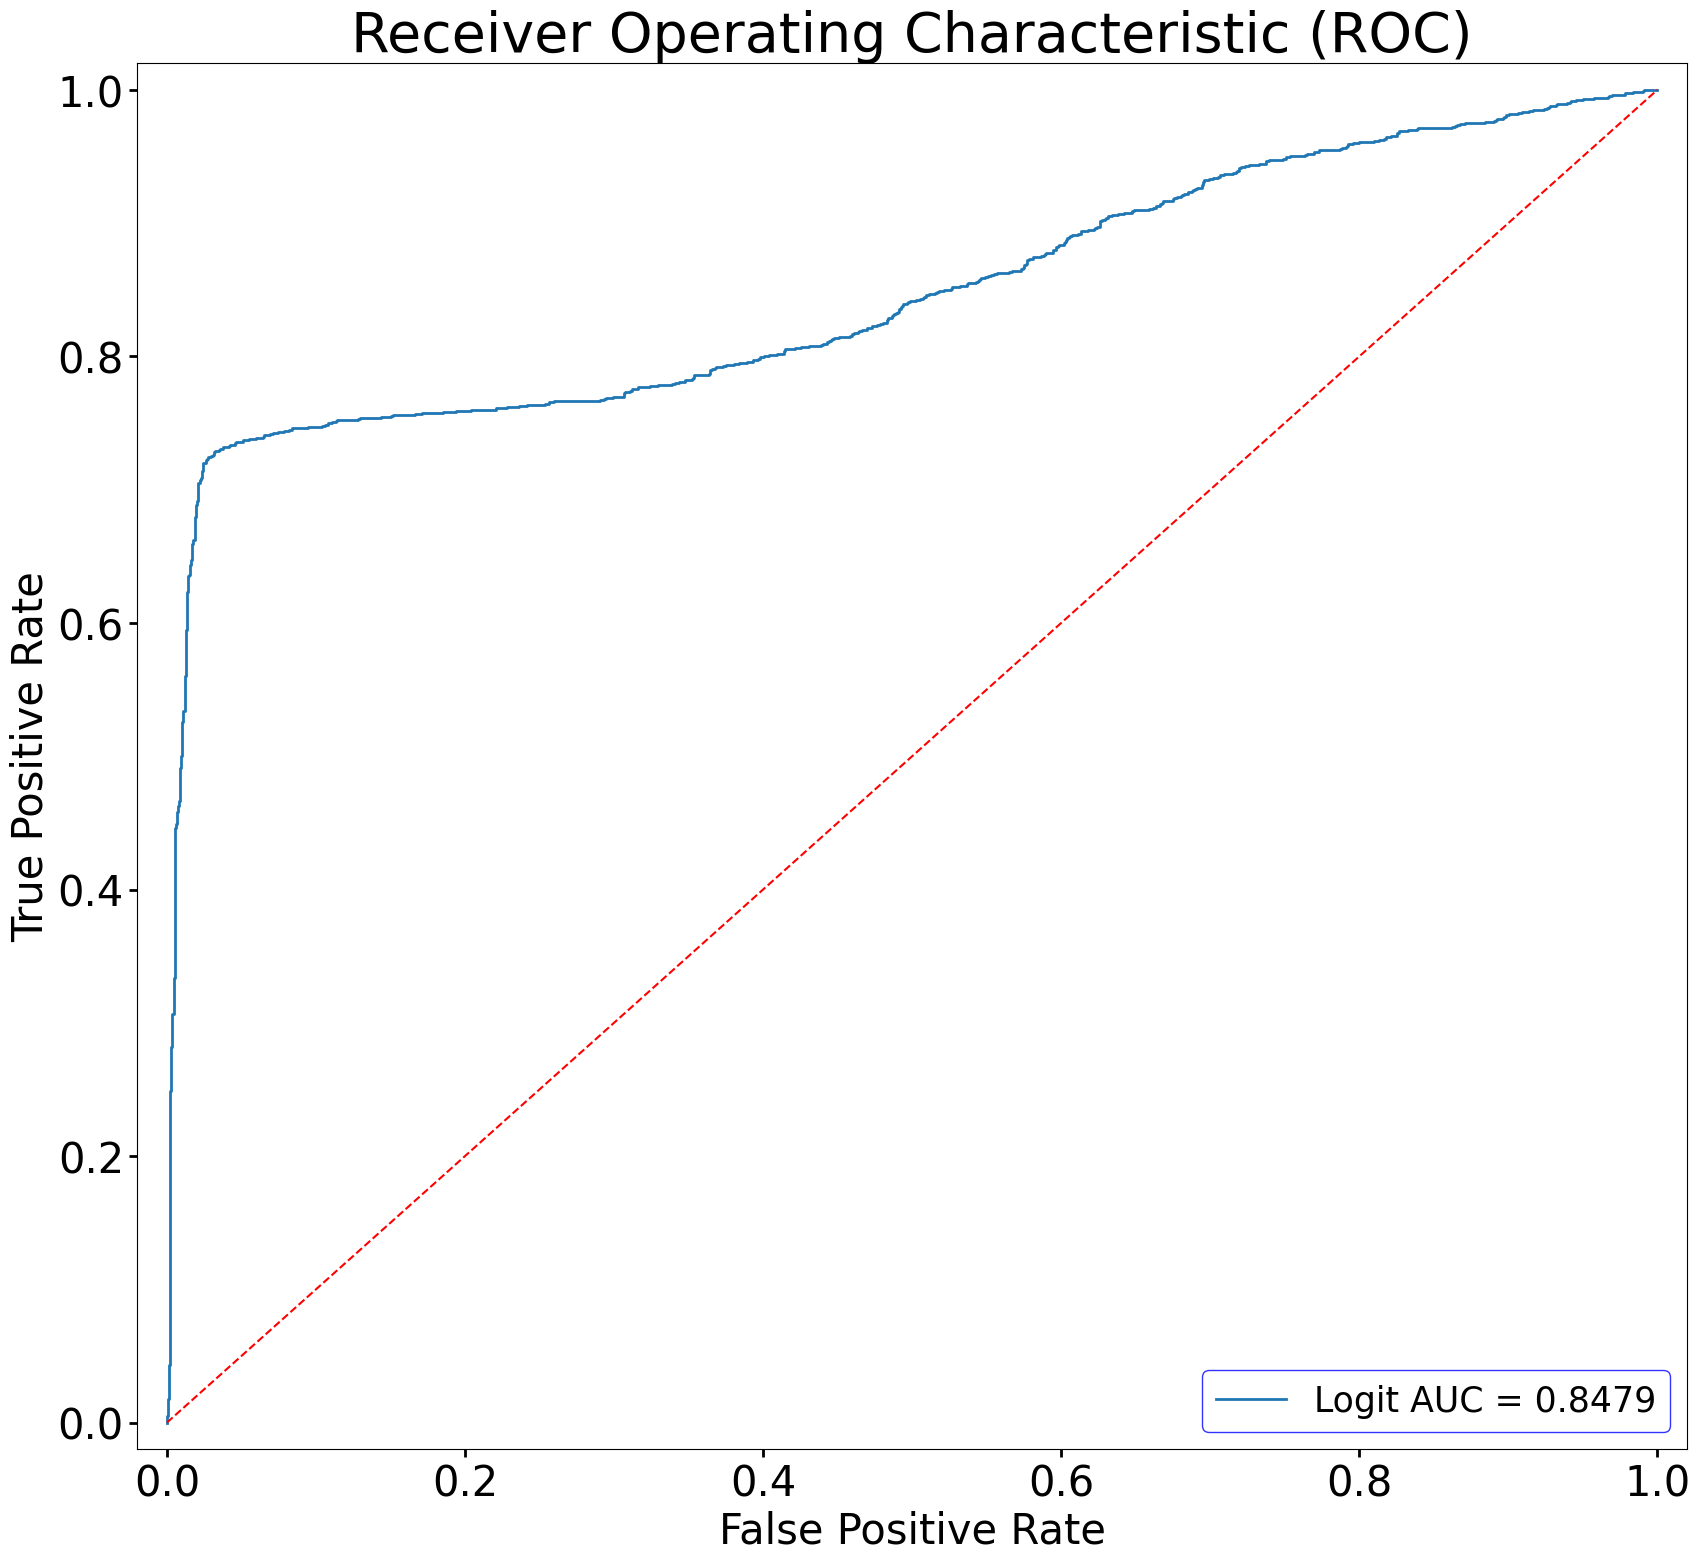

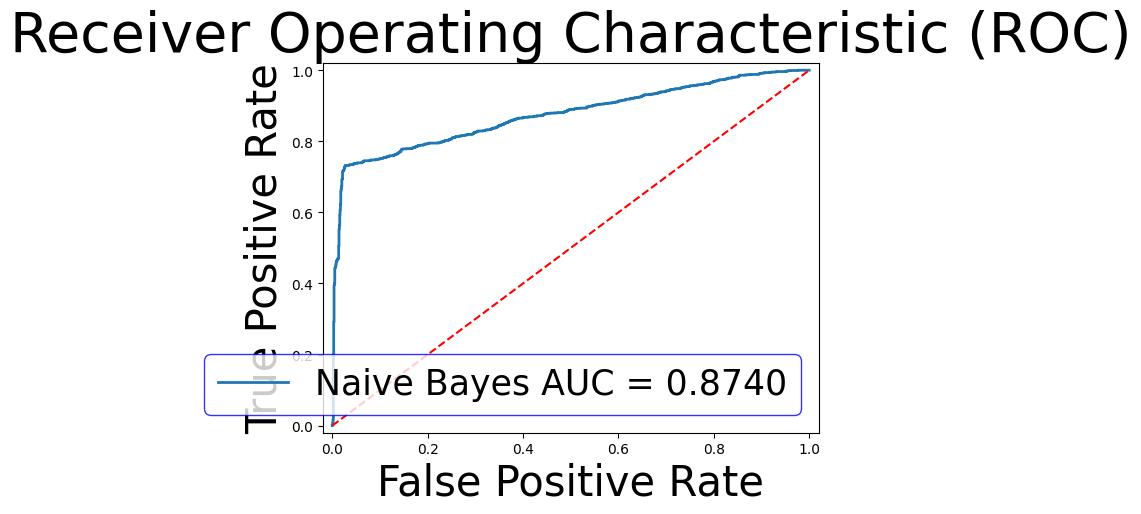

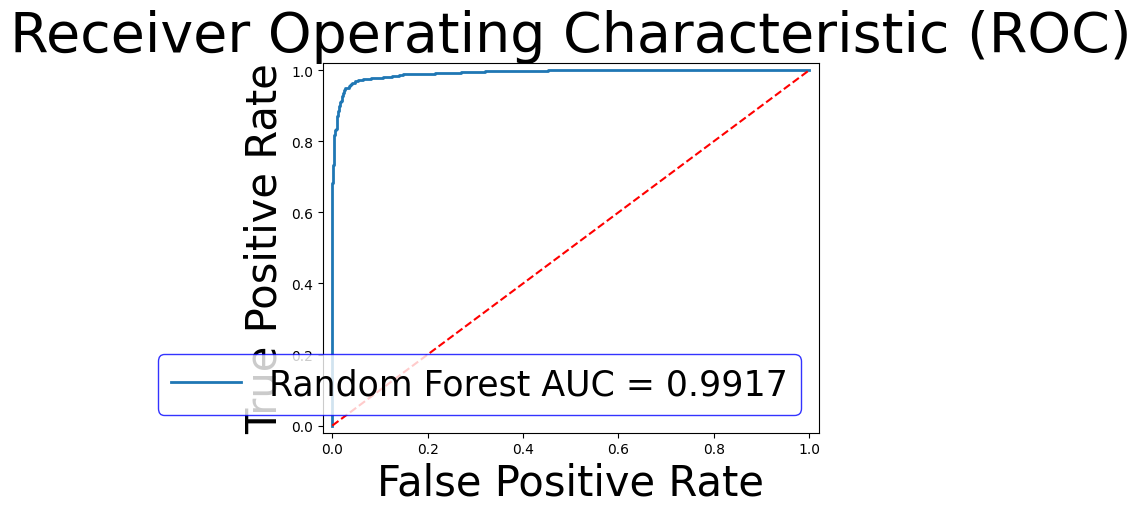

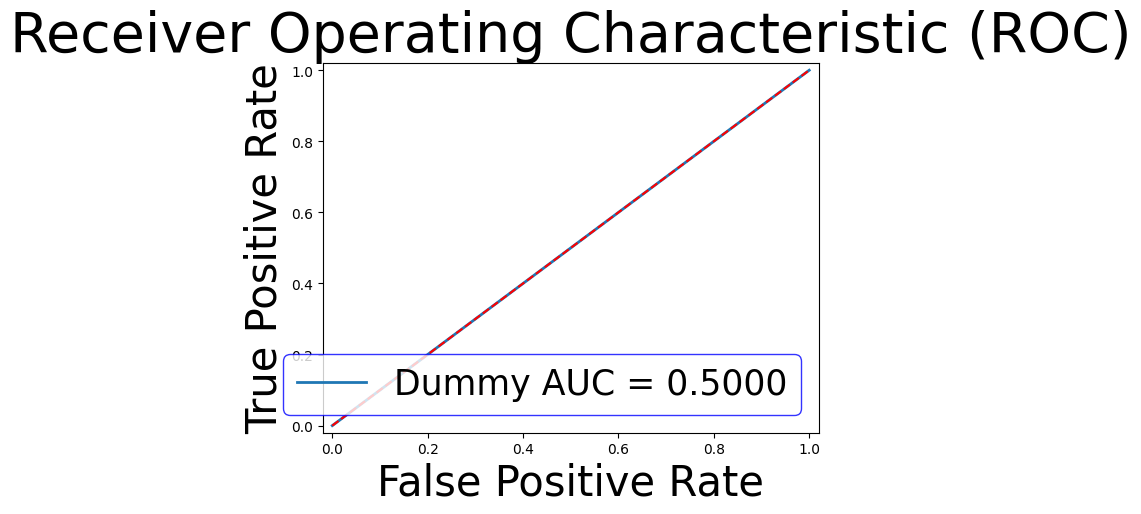

<Figure size 640x480 with 0 Axes>

In [97]:
# Define the list of models to compare
models = [logistic_grid.best_estimator_, gnb_best, rf_grid.best_estimator_, dummy]
model_names = ['Logit', 'Naive Bayes', 'Random Forest', 'Dummy']

# Plot ROC curves for in-sample data
plot_roc_curves(X_val_under, y_val_under, models, model_names)
# Save the plot as PNG file
plt.savefig('roc_insample.png');

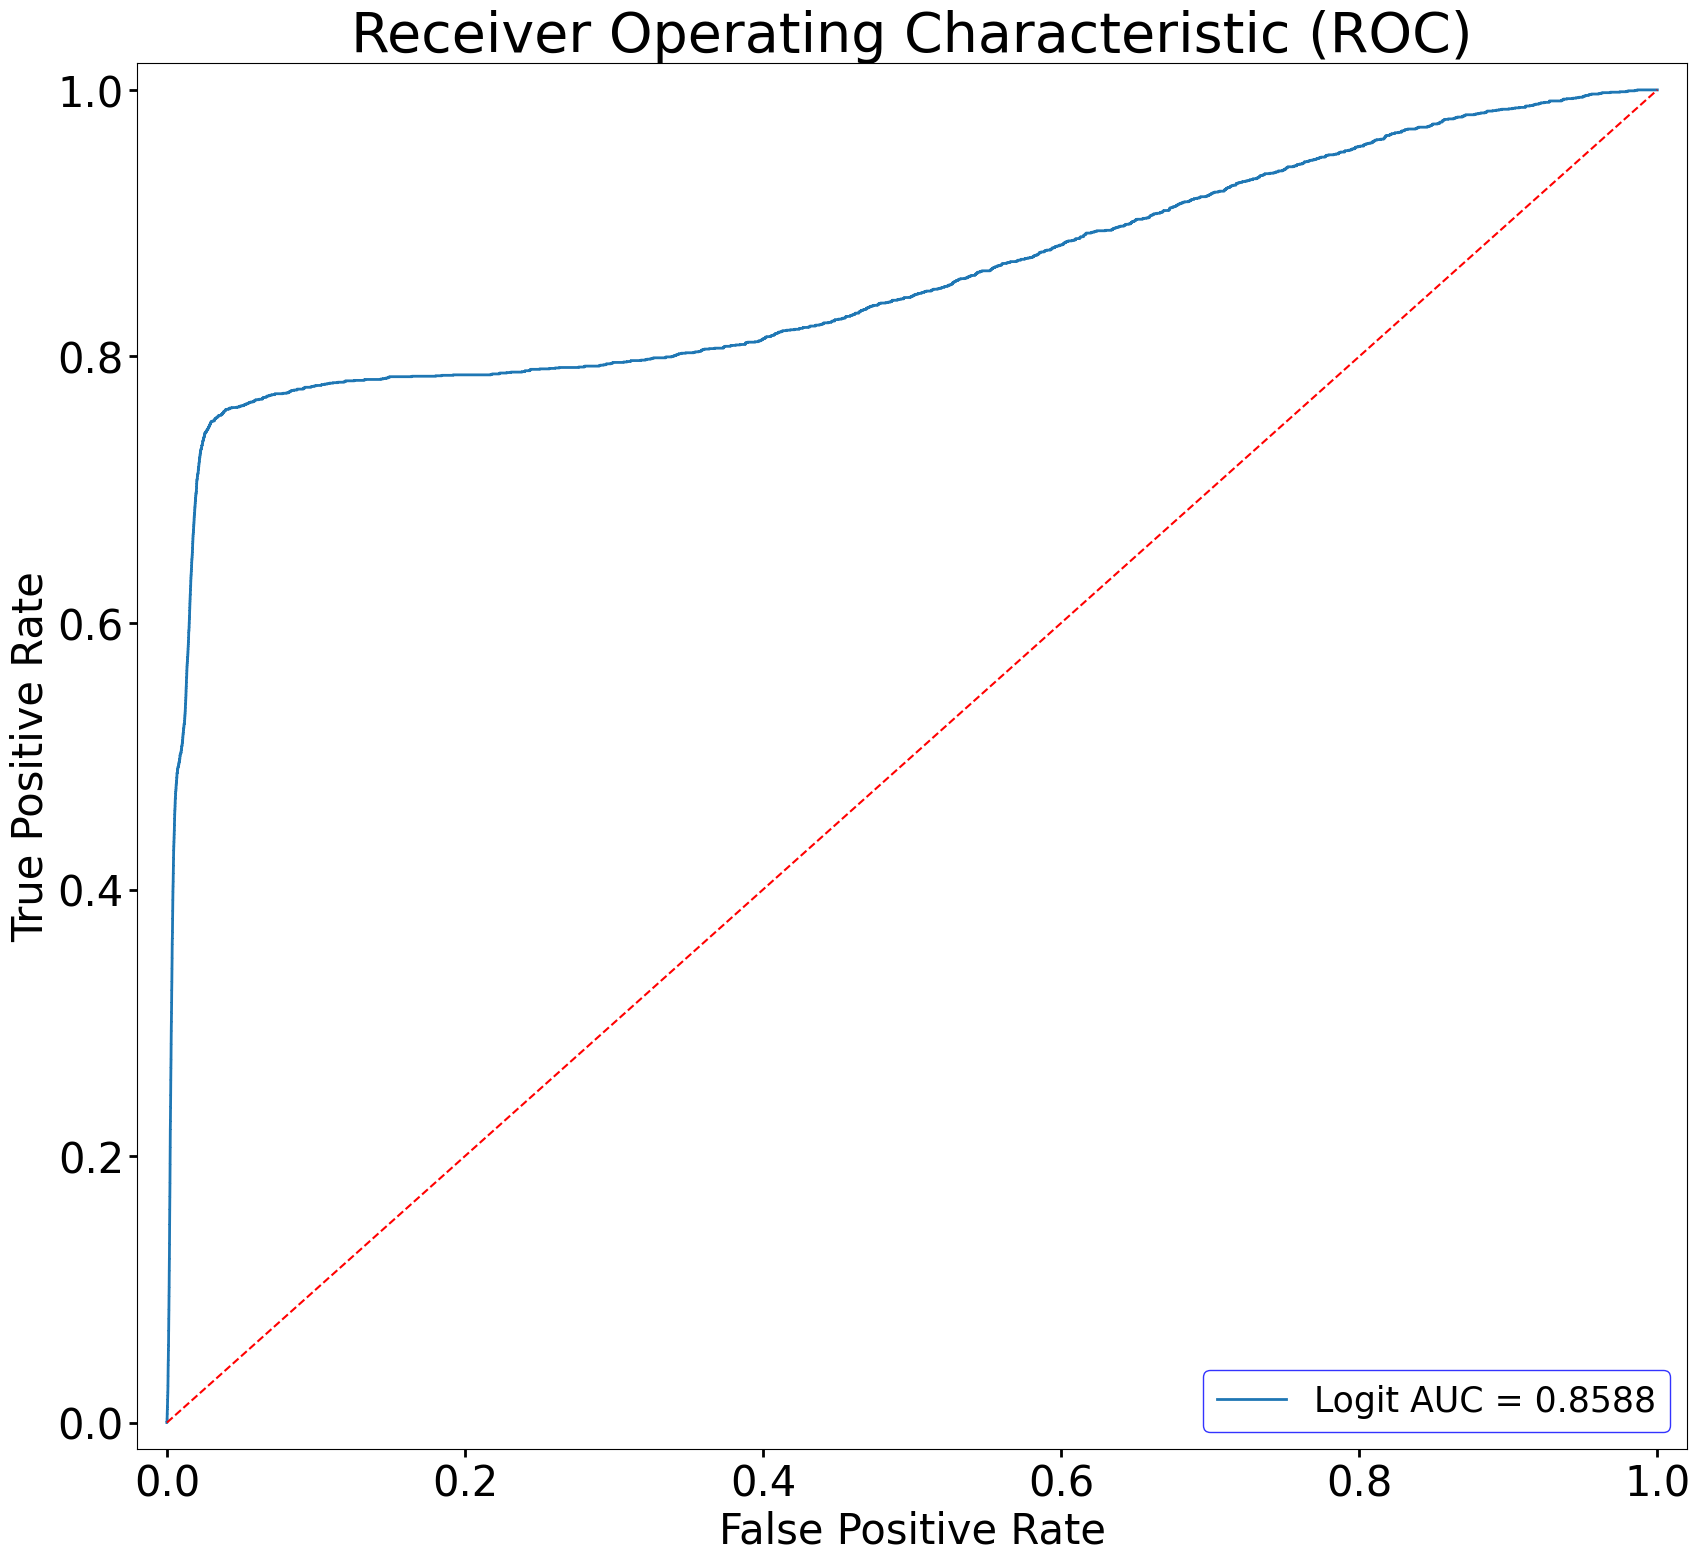

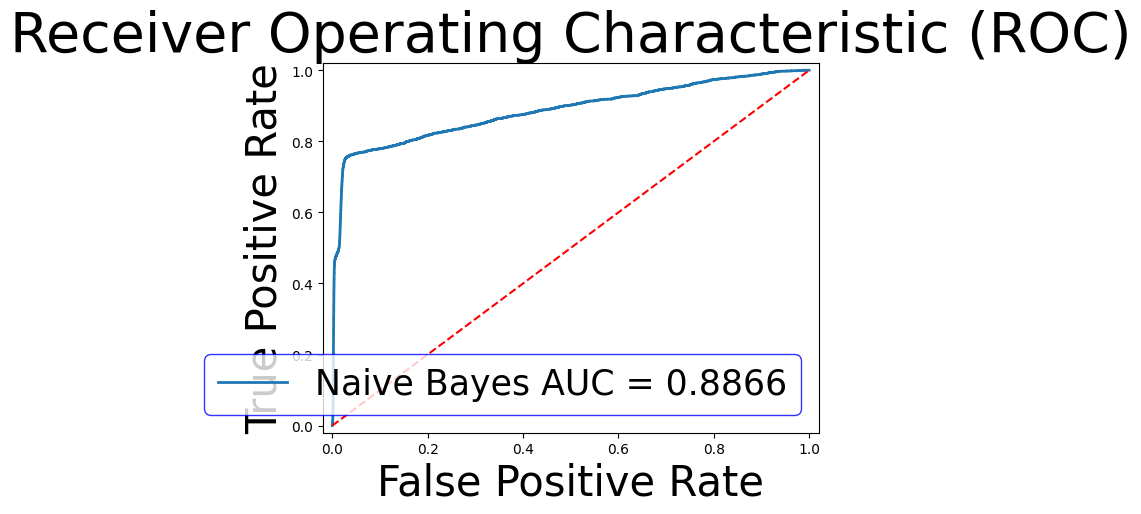

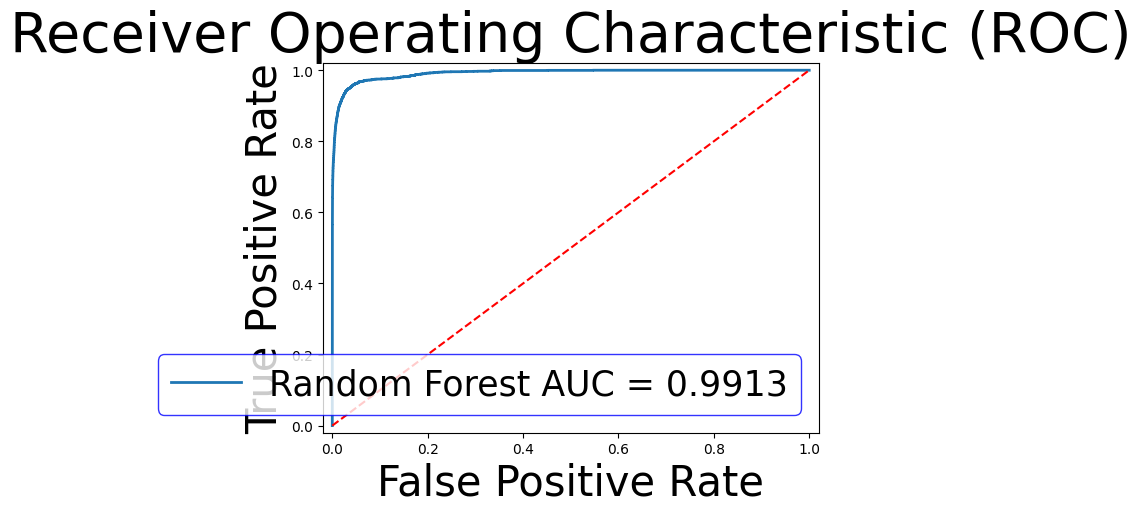

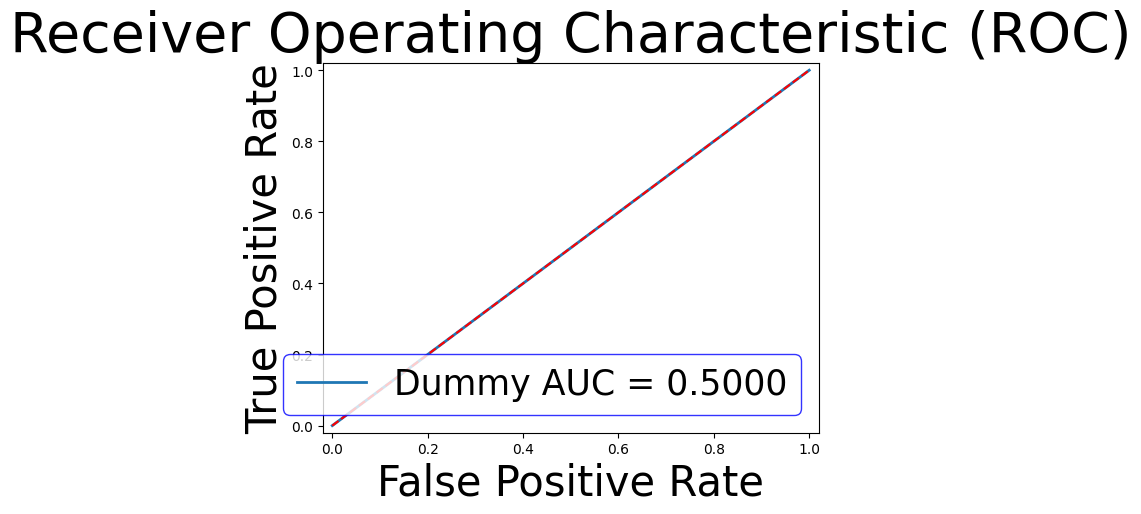

<Figure size 640x480 with 0 Axes>

In [98]:
# Plot ROC curves for out-of-sample data
plot_roc_curves(X_test_std, y_test, models, model_names)
# Save the plot as PNG file
plt.savefig('roc_outsample.png');

### Determine the optimal threshold for each model

In [101]:
# Define a function to find the best threshold for a given model
def find_best_threshold(model, num_steps):
        highest_f1 = 0
        best_threshold = 0
        best_acc = 0
        best_rec = 0
        best_pre = 0
 # Iterate over a range of thresholds
        for threshold in np.linspace(0, 1, num_steps):
 # Predict the target variable using the given threshold
                y_predict = (model.predict_proba(X_val_under)[:, 1] >=threshold)
 # Calculate various evaluation metrics
                f1 = f1_score(y_val_under, y_predict)
                acc = accuracy_score(y_val_under, y_predict)
                rec = recall_score(y_val_under, y_predict)
                pre = precision_score(y_val_under, y_predict)
# Update the best threshold and metrics if F1 score improves
                if f1 > highest_f1:
                        best_threshold, highest_f1, best_acc, best_rec, best_pre =threshold, f1, acc, rec, pre
# Return the best threshold and evaluation metrics
        return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [102]:

# Define a list of models and their names
models = [logistic_grid, gnb_best, rf_grid]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest"]
# Create an empty list to store the results
chart = list()
# Iterate over the models and find the best threshold for each one
for item, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item, 20)
 # Append the results to the chart list
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])


c:\Users\ve797\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ve797\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ve797\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [104]:
# Create a pandas dataframe from the chart list and display it
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
chart.to_csv('model_evaluation_scores.csv')
chart


,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.631579,0.827326,0.847520,0.730570,0.953623
1,Naive-Bayes,0.736842,0.831092,0.851221,0.732050,0.961127
2,Random Forest,0.421053,0.959882,0.959660,0.965211,0.954612


### Confusion Matrix

In [106]:
def make_confusion_matrix_val(model, threshold=0.5):

 # Predict class 1 if probability of being in class 1 is greater than threshold
 # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)

 # calculate the confusion matrix
    fraud_confusion = confusion_matrix(y_val_under, y_predict)

 # plot the confusion matrix as heatmap
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud']);

 # calculate TP, FP, FN, and TN values from the confusion matrix
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]

 # rotate y-axis ticks
    plt.yticks(rotation = 0)

 # set plot title, x and y labels
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')



findfont: Font family ['.SF Compact Display'] not found. Falling back to DejaVu Sans.


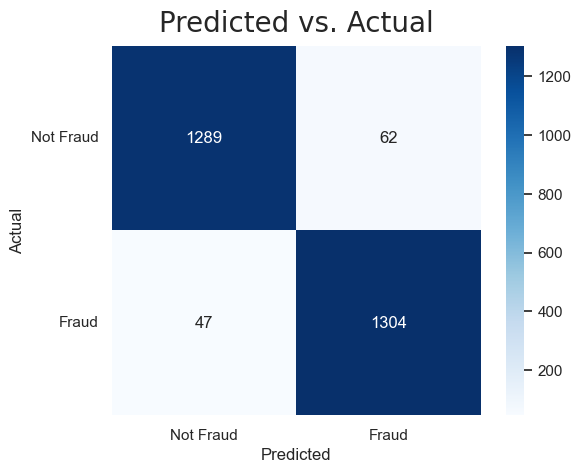

In [107]:
# Create a confusion matrix for the Random Forest model with a threshold of 0.421 on the validation data
make_confusion_matrix_val(rf_grid, threshold=0.421)
# Save the plot as PNG file
plt.savefig('confusion_matrix_val_random_forest.png');

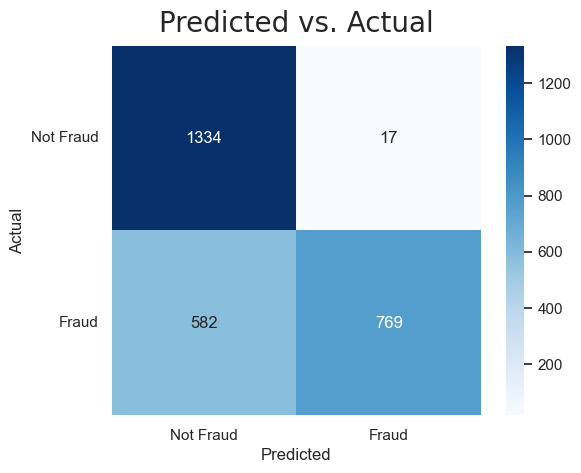

In [108]:
# Create a confusion matrix for the Logistic Regression model with a treshold of 0.842 on the validation data
make_confusion_matrix_val(logistic_grid, threshold=0.842)
# Save the plot as PNG file
plt.savefig('confusion_matrix_val_logistic_regression.png');


In [109]:
def make_confusion_matrix_test(model, threshold=0.5):
 # Predict class 1 if probability of being in class 1 is greater than threshold
   y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)
 # Generate confusion matrix
   fraud_confusion = confusion_matrix(y_test, y_predict)
 # Plot heatmap of confusion matrix
   plt.figure(dpi=100)
   sns.set(font_scale=1)
   sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
 # Calculate TP, FP, FN, TN
   TP = fraud_confusion[0][0]
   FP = fraud_confusion[0][1]
   FN = fraud_confusion[1][0]
   TN = fraud_confusion[1][1]
 # Add title, labels and rotate y-tick labels
   plt.yticks(rotation=0)
   plt.title('Predicted vs. Actual', fontname='.SF Compact Display', fontsize=20, pad=10)
   plt.xlabel('Predicted')
   plt.ylabel('Actual')


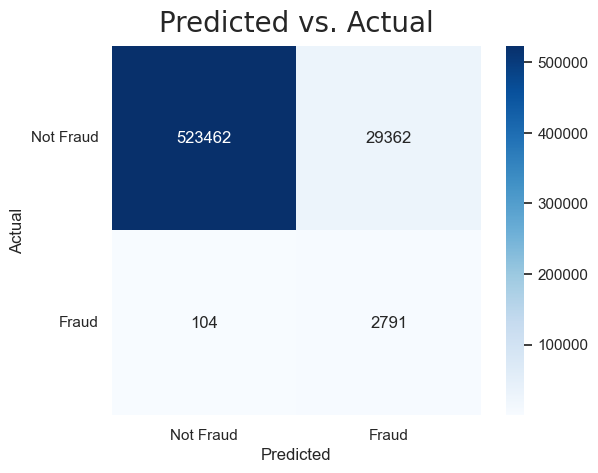

In [111]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(rf_grid, threshold=0.421)
# Save the plot as PNG file
plt.savefig('confusion_matrix_test_random_forest.png');


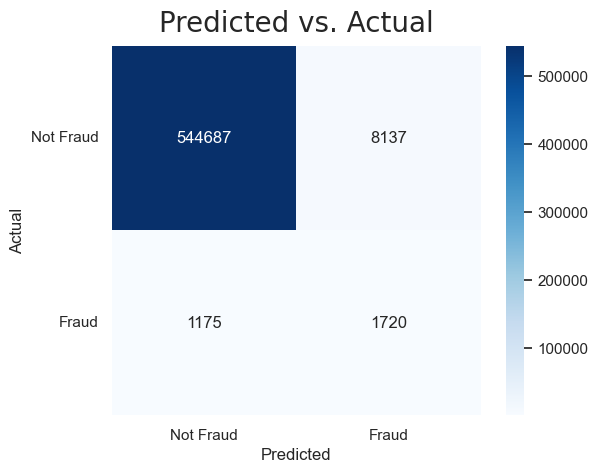

In [112]:
# Generate confusion matrix for logistic regression model on test dataset
make_confusion_matrix_test(logistic_grid, threshold=0.842)
# Save the plot as PNG file
plt.savefig('confusion_matrix_test_logistic_regression.png');